# Assigment 1

## The assignment is divided into programming and mathematical questions. Both of them are given in this notebook.

## Programming questions: I am giving you a template that you can use to write your code. Description of the questions is integrated in the comments.

## Upload your code on Learn dropbox and submit pdfs of the code and answers to the mathematical questions on Crowdmark.

## -----------------------------------------------------------------------------------------------------------

## Programming Questions

## Load modules

In [1]:
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage import data
from skimage.transform import resize

# Numpy is useful for handling arrays and dense matrices (a matrix with a lot of nonzeros).
import numpy as np

## Load image

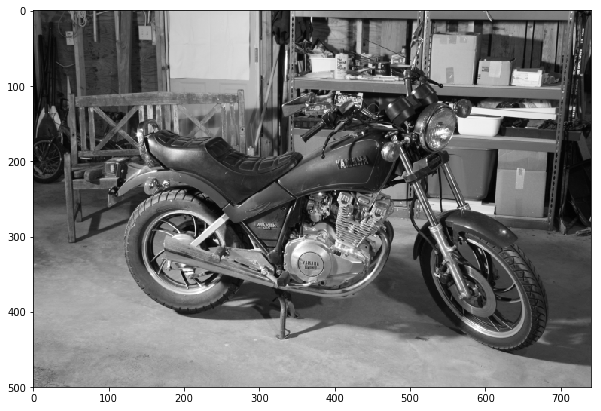

In [2]:
img = data.stereo_motorcycle()[0]
img = rgb2gray(img) * 255 # convert to gray and change scale from (0,1) to (0,255).

m = img.shape[0]
n = img.shape[1]
plt.figure(1, figsize = (10, 10))
plt.imshow(img, cmap ='gray', vmin = 0, vmax = 255)
plt.show()

## Question 1: compute the differences operators here. Note that the image is not a square image. Marks: 10/100

In [3]:
# You will need these three methods to construct the sparse differences operators.
# If you do not use sparse operators you might have memory problems.
from scipy.sparse import diags
from scipy.sparse import kron
from scipy.sparse import identity

#In order to get an m*n Difference operator, we make the J a size of m*m square matrix
#Because when we multiple it with an Identity matrix of size n*n, 
#Each item in the diagonals of the resulting martix will be I of size n*n, so the finale 
#resulting matrix, the Difference operators will be size m*n

J = diags([1, -1], [0, 1], shape = (m, m)).tocsr()
I = identity(n).tocsr()
D_h = kron(J, I).tocsr()
D_v = kron(I, J).tocsr()

print('Done constructing the differences operators')
print('Dimensions:')
print('D_h:', D_h.shape)
print('D_v:', D_v.shape)

Done constructing the differences operators
Dimensions:
D_h: (370500, 370500)
D_v: (370500, 370500)


## Question 2: visualize the differences operators applied on the image. Marks: 5/100

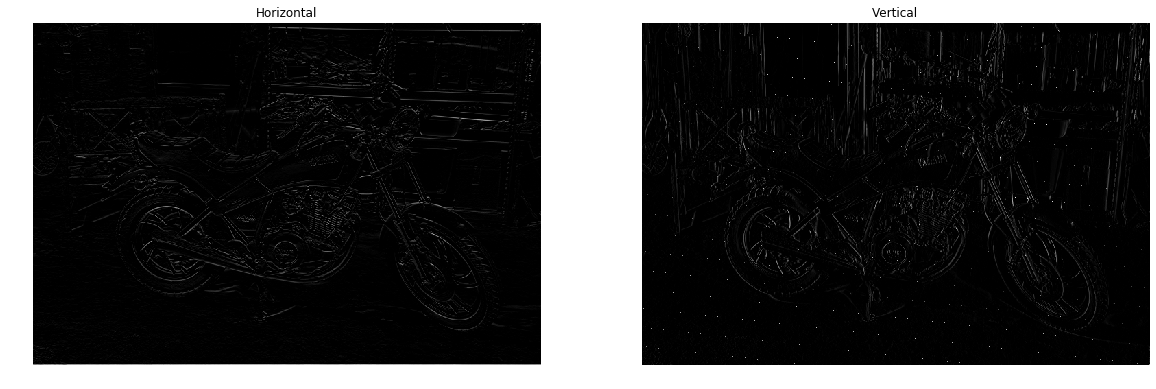

In [4]:
#Check the figures in the lecture notes on piazza to see an example of what the output should be like. 

# Start coding here.
#We simple flatten the image into a column vector
#Calculate the horizontal and vertical images by applying D_h and D_v operator respectively

imageVector = np.reshape(img, (m * n, 1))

horizontal = D_h.dot(imageVector)
horizontalImage = np.reshape(horizontal, (m, n))

vertical = D_v.dot(imageVector)
verticalImage = np.reshape(vertical, (m, n))

figure, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 15))

axes[0].imshow(horizontalImage, cmap = 'gray', vmin = 0, vmax = 255)
axes[1].imshow(verticalImage, cmap = 'gray', vmin = 0, vmax = 255)
axes[0].axis('off')
axes[1].axis('off')
axes[0].set_title('Horizontal')
axes[1].set_title('Vertical')
plt.show()

## Add noise to the image

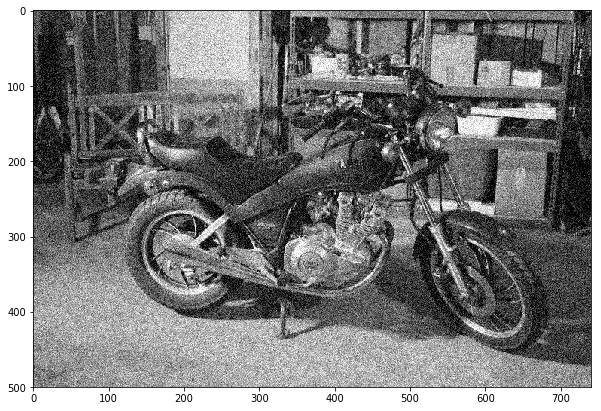

In [5]:
mean_ = 0
standard_deviation = 30
dimensions = (m,n)

noise = np.random.normal(mean_,standard_deviation,dimensions)

noisy_image = img + noise

plt.figure(1, figsize = (10, 10))
plt.imshow(noisy_image, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

## Quetion 3: Denoise the image. Marks: 20/100

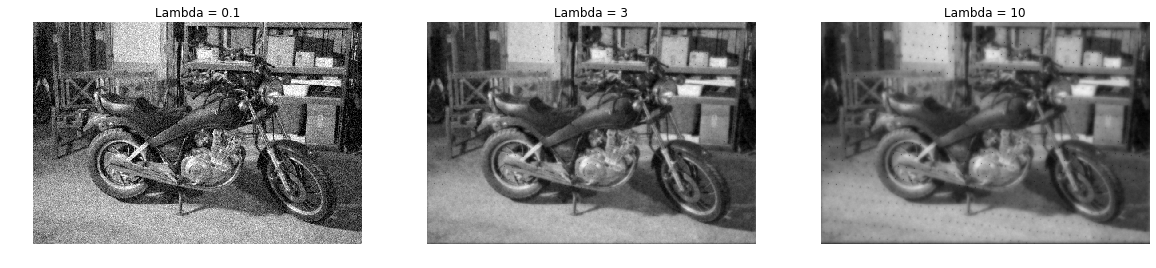

In [6]:
# This method can be used to solve linear systems.
from scipy.sparse.linalg import spsolve
# This module can be used to convert arrays and matrices from complex to real.
from scipy import real

# Use the following lambda list to tune the denoising problem.
lambda_list = [0.1, 3, 10]

# Start coding here. Check figures in Lecture to see an example of what the output should be like.
#We apply the eqautions given to us in lecture to calculate the images

I = identity(m * n).tocsr()
z = np.reshape(noisy_image, (m * n, 1))
images = np.empty(len(lambda_list), dtype = object)

realD = np.add(np.dot(np.transpose(D_h), D_h), np.dot(np.transpose(D_v), D_v)) 

def solveLinear(lambdaVal):
    A = np.dot(lambdaVal, realD) + I
    b = z
    x = spsolve(A, b)
    return x


for i in range(len(lambda_list)):
    x = solveLinear(lambda_list[i])
    images[i] = np.reshape(x, (m, n))
    
figure, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))

axes[0].imshow(images[0], cmap = 'gray', vmin = 0, vmax = 255)
axes[1].imshow(images[1], cmap = 'gray', vmin = 0, vmax = 255)
axes[2].imshow(images[2], cmap = 'gray', vmin = 0, vmax = 255)
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[0].set_title('Lambda = ' + str(lambda_list[0]))
axes[1].set_title('Lambda = ' + str(lambda_list[1]))
axes[2].set_title('Lambda = ' + str(lambda_list[2]))
plt.show()

# Non-programming questions

## Question 4: compute the gradient of the denoising objective function $f(x) = \frac{\lambda}{2}\|Dx\|_2^2 + \frac{1}{2}\|x-z_{noisy}\|_2^2$, where $x$ consists of $n$ coordinates. The gradient has already been given in the class and you are asked to analytically compute and show any steps for deriving the gradient. Marks: 20/100

## Question 5: compute the second derivative (Hessian matrix) of the denoising objective function $f(x) = \frac{\lambda}{2}\|Dx\|_2^2 + \frac{1}{2}\|x-z_{noisy}\|_2^2$, where $x$ consists of $n$ coordinates. The Hessian matrix has already been given in the class and you are asked to analytically compute and show any steps for deriving the gradient. Marks: 10/100

## Question 6: prove that the denoising objective function $f(x) = \frac{\lambda}{2}\|Dx\|_2^2 + \frac{1}{2}\|x-z_{noisy}\|_2^2$ is a convex function. Prove this without using the fact that the objective function is differentiable. Marks: 20/100

## Question 7: You are given a function $f$ that is twice differentiable and not necessarily convex. Explain why if a point $x$ that satisfies $\nabla f(x) = 0$ is not necessarily a local minimizer of function $f$. Hint: use the Taylor expansion $f(y)=f(x) + \nabla f(x)^T (y-x) + (y-x)^T \nabla^2 f(x) (y-x) + \mathcal{o}(\|y-x\|^2_2)$. Note that $\mathcal{o}$ denotes the little-o notation and $\mathcal{o}(\|y-x\|^2_2)$ can be intepreted as a function that goes to zero faster than $\|y-x\|^2_2$. Marks: 15/100